In [1]:
import numpy as np
import pandas as pd

# read dataset
original_dataset = pd.read_excel('A1_Data.xlsx')

In [20]:
print(original_dataset.describe())
print(original_dataset.shape)
original_dataset.dtypes

       Minimum_Temperature  Maximum_Temperature  Temperature_AM  \
count        134110.000000        134387.000000   134692.000000   
mean             12.144484            23.321705       16.970687   
std               6.428055             7.214363        6.554124   
min              -8.500000            -4.800000       -7.200000   
25%               7.500000            17.900000       12.200000   
50%              11.900000            22.800000       16.600000   
75%              16.800000            28.500000       21.600000   
max              33.900000            48.100000       40.200000   

       Temperature_PM  Wind_Speed_AM  Wind_Speed_PM  Max_WindGust_Speed  \
count   134692.000000  133369.000000  132240.000000       125724.000000   
mean        21.792406      13.951293      18.663203           40.126173   
std          7.037912       8.892540       8.836756           13.598228   
min         -5.400000       0.000000       0.000000            6.000000   
25%         16.600000

City_Name                   object
City_State                  object
Date                        object
Season                      object
Climate_Type                object
Minimum_Temperature        float64
Maximum_Temperature        float64
Temperature_AM             float64
Temperature_PM             float64
Wind_Direction_AM           object
Wind_Direction_PM           object
Wind_Speed_AM              float64
Wind_Speed_PM              float64
Max_WindGust_Direction      object
Max_WindGust_Speed         float64
Significant_Rainfall        object
Rainfall_Amount            float64
Humidity_AM                float64
Humidity_PM                float64
Atmospheric_Pressure_AM    float64
Atmospheric_Pressure_PM    float64
CloudCover_Oktas_AM          int64
CloudCover_Oktas_PM          int64
ReductionBurn_Tomorrow       int64
dtype: object

In [3]:
original_dataset.isna().sum()

City_Name                     0
City_State                    0
Date                          0
Season                        0
Climate_Type                  0
Minimum_Temperature         582
Maximum_Temperature         305
Temperature_AM                0
Temperature_PM                0
Wind_Direction_AM          9531
Wind_Direction_PM          3558
Wind_Speed_AM              1323
Wind_Speed_PM              2452
Max_WindGust_Direction     9027
Max_WindGust_Speed         8968
Significant_Rainfall          0
Rainfall_Amount            1350
Humidity_AM                   0
Humidity_PM                   0
Atmospheric_Pressure_AM       0
Atmospheric_Pressure_PM       0
CloudCover_Oktas_AM           0
CloudCover_Oktas_PM           0
ReductionBurn_Tomorrow        0
dtype: int64

In [23]:
# fill NA based on season and climate_type
# categorical=> mode
# int/float =>mean
df1 = original_dataset.copy(deep=True)
df1['Wind_Direction_AM'] = df1.groupby(['Season', 'Climate_Type'],sort=False)['Wind_Direction_AM'].apply(lambda x: x.fillna(x.mode()[0]))
df1['Wind_Direction_PM'] = df1.groupby(['Season', 'Climate_Type'],sort=False)['Wind_Direction_PM'].apply(lambda x: x.fillna(x.mode()[0]))
df1['Max_WindGust_Direction'] = df1.groupby(['Season', 'Climate_Type'],sort=False)['Max_WindGust_Direction'].apply(lambda x: x.fillna(x.mode()[0]))
df1['Minimum_Temperature'] = df1.groupby(['Season', 'Climate_Type'],sort=False)['Minimum_Temperature'].apply(lambda x: x.fillna(x.mean()))
df1['Maximum_Temperature'] = df1.groupby(['Season', 'Climate_Type'],sort=False)['Maximum_Temperature'].apply(lambda x: x.fillna(x.mean()))
df1['Wind_Speed_AM'] = df1.groupby(['Season', 'Climate_Type'],sort=False)['Wind_Speed_AM'].apply(lambda x: x.fillna(x.mean()))
df1['Wind_Speed_PM'] = df1.groupby(['Season', 'Climate_Type'],sort=False)['Wind_Speed_PM'].apply(lambda x: x.fillna(x.mean()))
df1['Max_WindGust_Speed'] = df1.groupby(['Season', 'Climate_Type'],sort=False)['Max_WindGust_Speed'].apply(lambda x: x.fillna(x.mean()))
df1['Rainfall_Amount'] = df1.groupby(['Season', 'Climate_Type'],sort=False)['Rainfall_Amount'].apply(lambda x: x.fillna(x.mean()))

In [24]:
# print(df1.describe())
print(df1.isna().sum())

City_Name                  0
City_State                 0
Date                       0
Season                     0
Climate_Type               0
Minimum_Temperature        0
Maximum_Temperature        0
Temperature_AM             0
Temperature_PM             0
Wind_Direction_AM          0
Wind_Direction_PM          0
Wind_Speed_AM              0
Wind_Speed_PM              0
Max_WindGust_Direction     0
Max_WindGust_Speed         0
Significant_Rainfall       0
Rainfall_Amount            0
Humidity_AM                0
Humidity_PM                0
Atmospheric_Pressure_AM    0
Atmospheric_Pressure_PM    0
CloudCover_Oktas_AM        0
CloudCover_Oktas_PM        0
ReductionBurn_Tomorrow     0
dtype: int64


In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# check types
print(df1.dtypes)
print(df1.shape)

City_Name                   object
City_State                  object
Date                        object
Season                      object
Climate_Type                object
Minimum_Temperature        float64
Maximum_Temperature        float64
Temperature_AM             float64
Temperature_PM             float64
Wind_Direction_AM           object
Wind_Direction_PM           object
Wind_Speed_AM              float64
Wind_Speed_PM              float64
Max_WindGust_Direction      object
Max_WindGust_Speed         float64
Significant_Rainfall        object
Rainfall_Amount            float64
Humidity_AM                float64
Humidity_PM                float64
Atmospheric_Pressure_AM    float64
Atmospheric_Pressure_PM    float64
CloudCover_Oktas_AM          int64
CloudCover_Oktas_PM          int64
ReductionBurn_Tomorrow       int64
dtype: object
(134692, 24)


In [26]:
#Nominal to numerical
nominal_columns=df1.select_dtypes(include= ['object']) 
numerical_columns=df1.select_dtypes(exclude= ['object'])
nominal_converted = nominal_columns.apply(le.fit_transform)
Final_dataset = pd.concat([numerical_columns, nominal_converted], axis=1)

<AxesSubplot:>

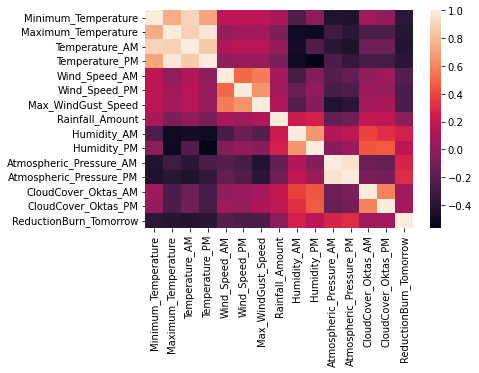

In [103]:
import seaborn as sns   
sns.heatmap(numerical_columns.corr())


<Figure size 800x640 with 0 Axes>

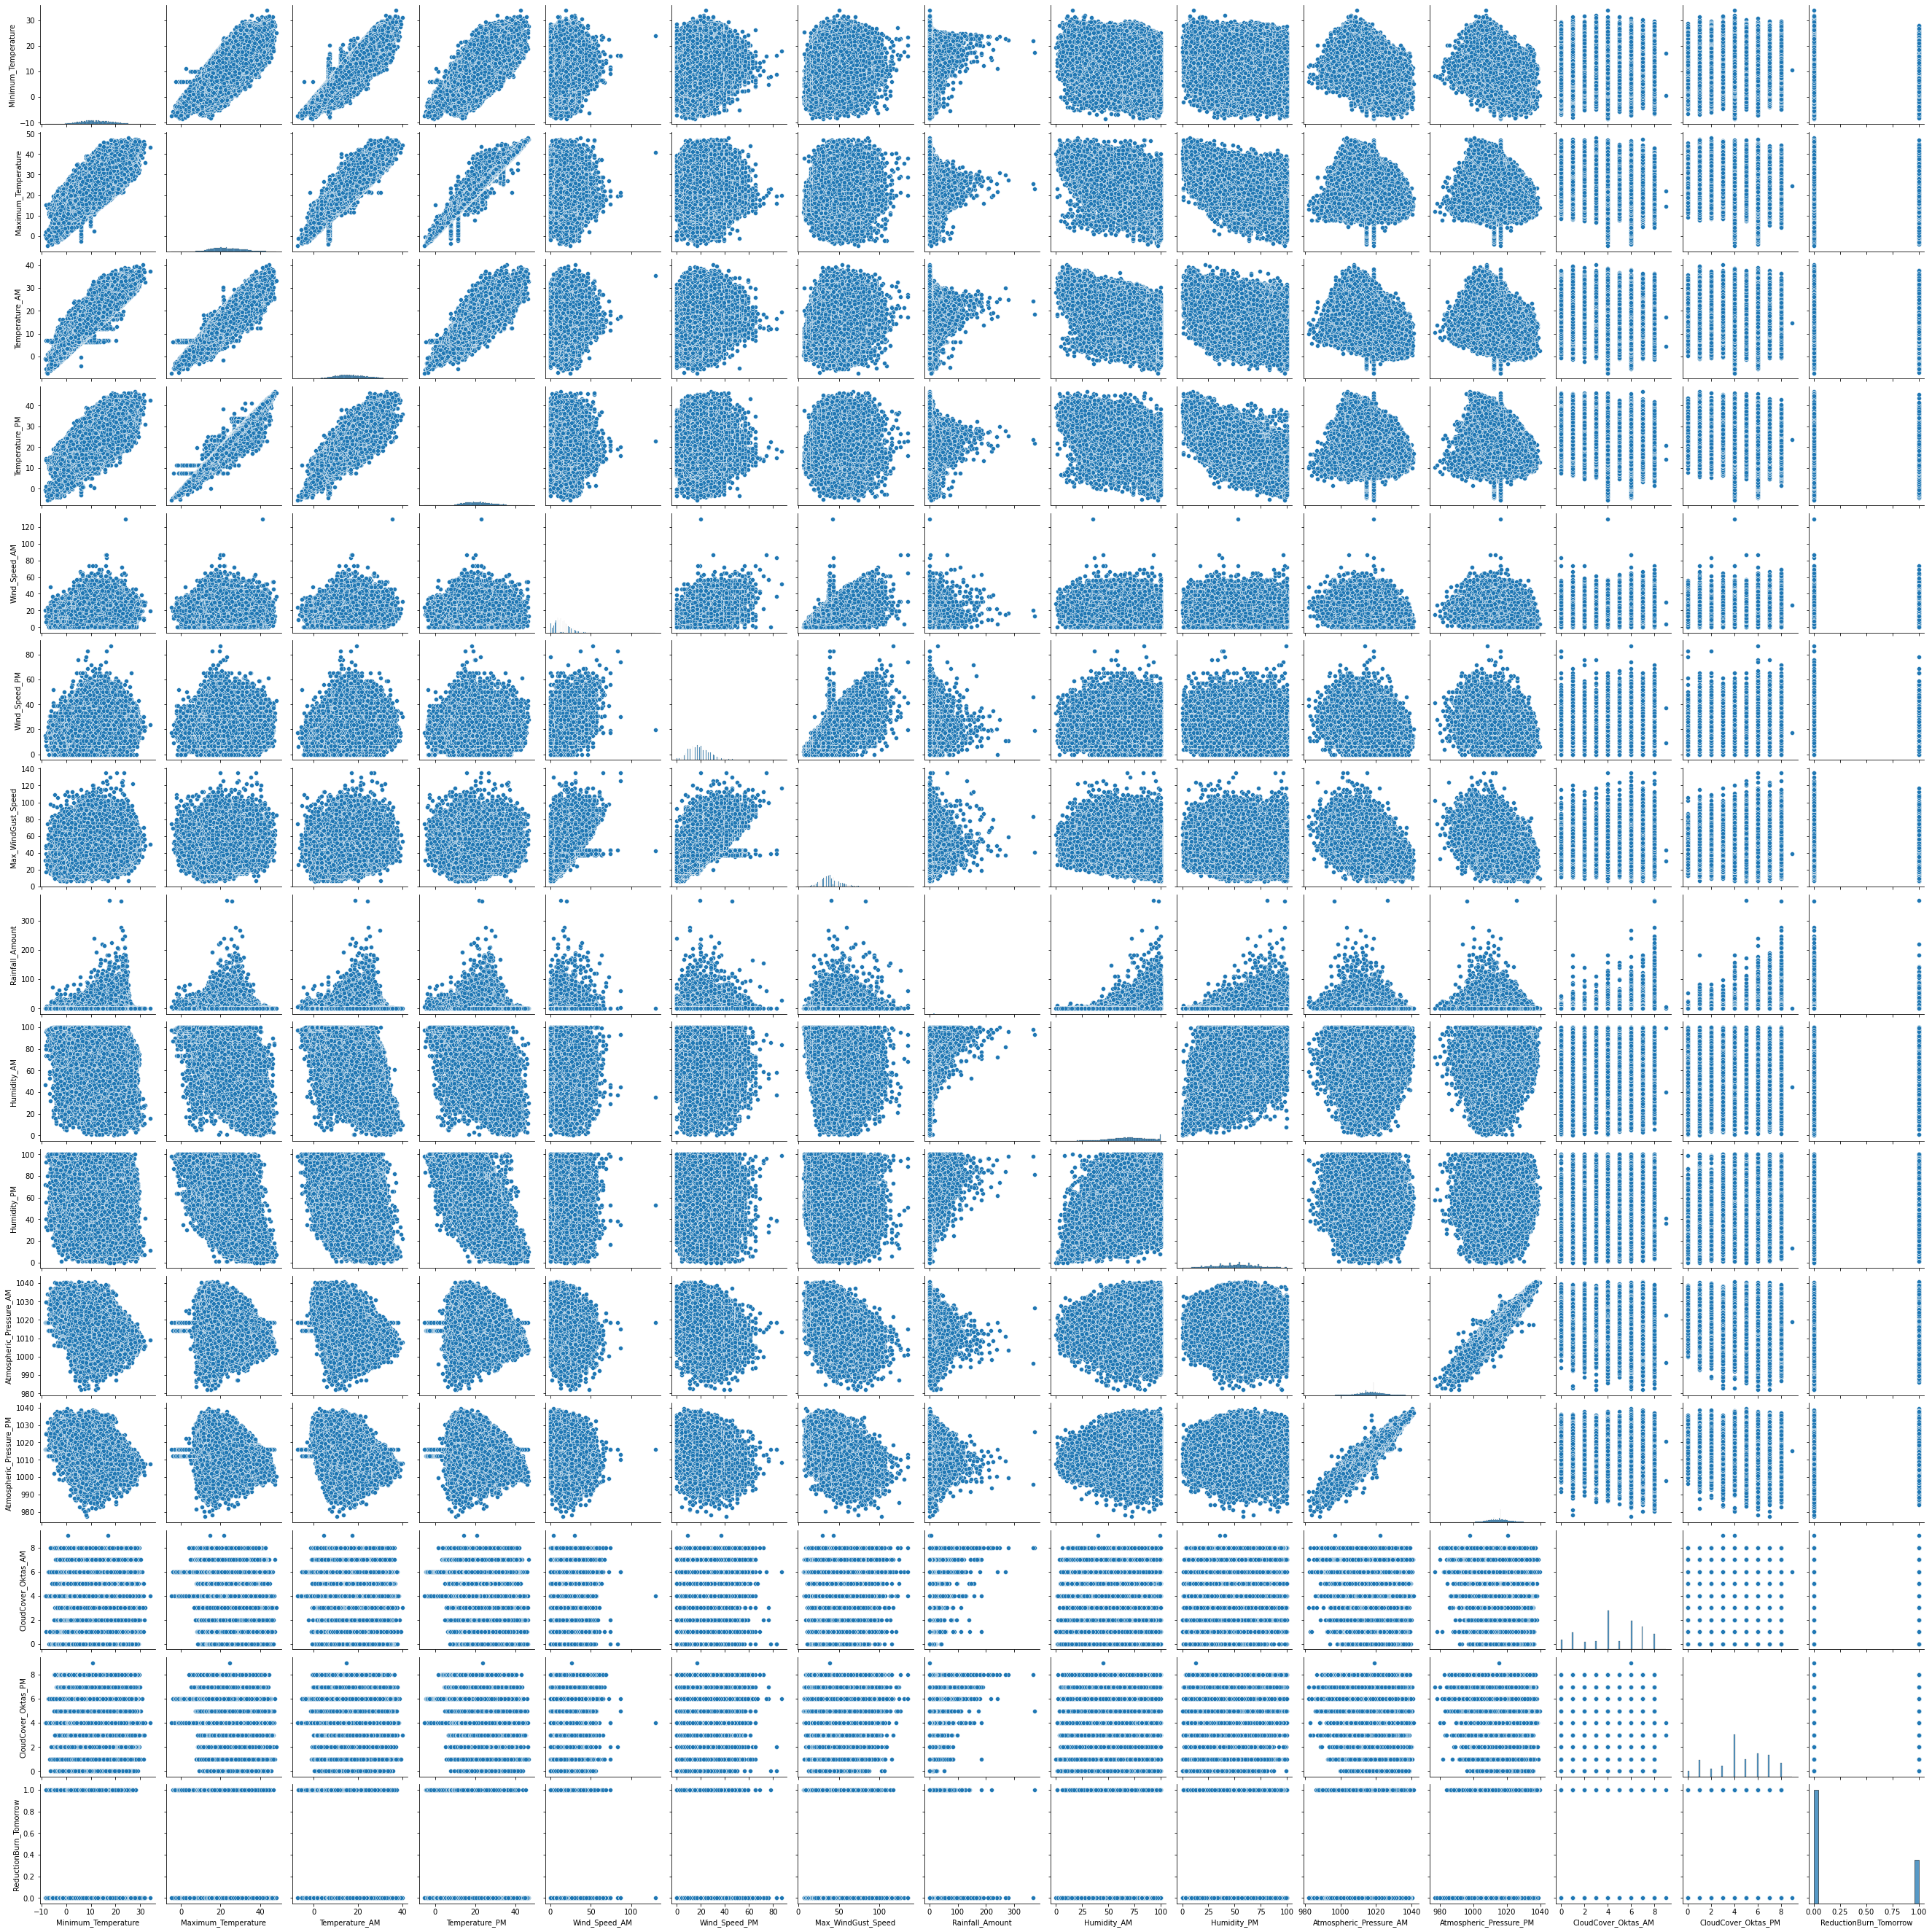

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8), dpi=80)
sns.pairplot(numerical_columns,
             kind="scatter")
plt.show()

In [105]:
numerical_columns.corr().style.background_gradient(cmap='coolwarm')

In [27]:
# get average of some features for PCA
parser =pd.DataFrame(data=None,columns=range(1,1))
parser['temp average'] = (numerical_columns['Temperature_AM']+numerical_columns['Temperature_PM'])/2
parser['temp Wind'] = (numerical_columns['Wind_Speed_AM']+numerical_columns['Wind_Speed_PM'])/2
parser['humidity'] = (numerical_columns['Humidity_AM']+numerical_columns['Humidity_PM'])/2
parser['pressure'] = (numerical_columns['Atmospheric_Pressure_AM']+numerical_columns['Atmospheric_Pressure_PM'])/2
parser['cloud'] = (numerical_columns['CloudCover_Oktas_AM']+numerical_columns['CloudCover_Oktas_PM'])/2
parser['Max_WindGust_Speed']=numerical_columns['Max_WindGust_Speed']
parser['Rainfall_Amount']=numerical_columns['Rainfall_Amount']
parser.head(2)


temp average  temp Wind  humidity  pressure  cloud  Max_WindGust_Speed  \
0          14.2       14.0      79.5   1017.55    4.0                48.0   
1          14.6       14.0      63.5   1022.50    4.0                35.0   

   Rainfall_Amount  
0              5.0  
1              0.8

Text(0, 0.5, 'cm variance')

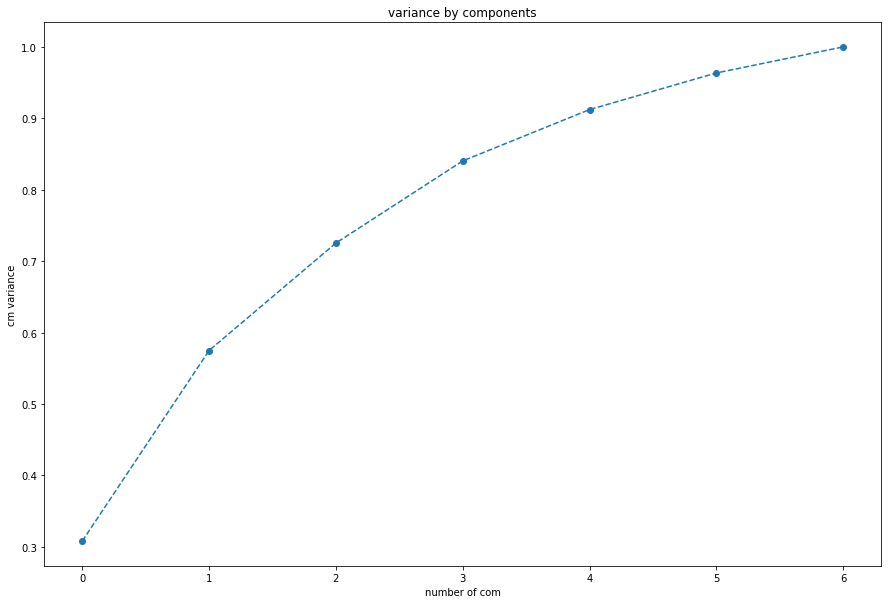

In [28]:
#Import the preprocessing function from sklearn
import sklearn
from sklearn import preprocessing, metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# since there are many features, impletement principle components analysis
# visualise the graph based on number of components vs variance
# fire_or_not = Final_dataset[['ReductionBurn_Tomorrow']]
# features_df = Final_dataset.loc[:,Final_dataset.columns !='ReductionBurn_Tomorrow']
X_= sklearn.preprocessing.StandardScaler().fit_transform(parser)

# variance vs number of components
pca = PCA()
principalComponents = pca.fit(X_)
plt.figure(figsize=(15,10))
plt.plot(range(0,7),principalComponents.explained_variance_ratio_.cumsum(),marker = 'o',linestyle= '--')
plt.title('variance by components')
plt.xlabel('number of com')
plt.ylabel('cm variance')

In [29]:
# visually about 3 components
pca= PCA(n_components=3)
score = pca.fit(X_).transform(X_)
kmean_result = []
# find optimal k
for i in range(1,8):
    kmeans_pca = KMeans(n_clusters=i,init='k-means++',random_state=48)
    kmeans_pca.fit(score)
    kmean_result.append(np.sqrt(kmeans_pca.inertia_))

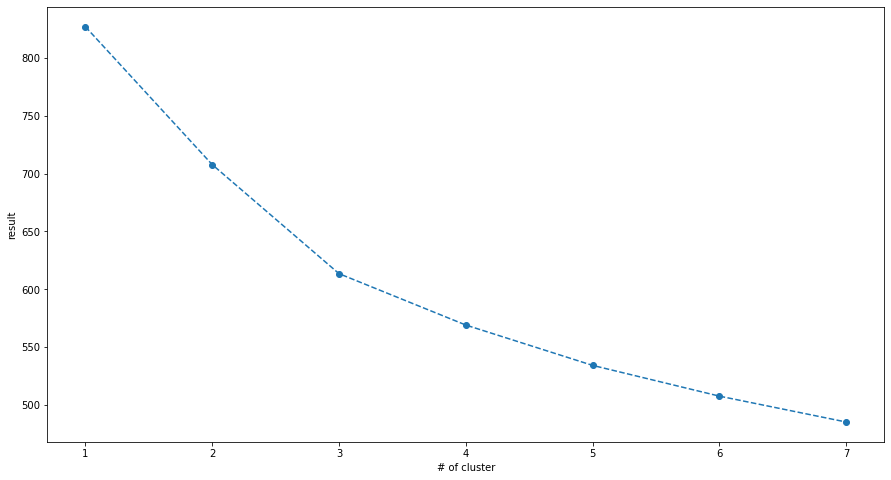

In [30]:
plt.figure(figsize=(15,8))
plt.plot(range(1,8),kmean_result,marker='o',linestyle='--')
plt.xlabel('# of cluster')
plt.ylabel('result')
plt.show()

In [110]:
df_kmeans=pd.concat([parser.reset_index(drop=True),pd.DataFrame(score)],axis=1)
df_kmeans.columns.values[-3:] =['comp1','comp2','comp3']
df_kmeans['segmenta k-means pca']=kmeans_pca.labels_
df_kmeans['segment']= df_kmeans['segmenta k-means pca'].map({0:'1st',1:'2nd',3:'3rd',4:'4th'})

d:\anaconda\envs\7212\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


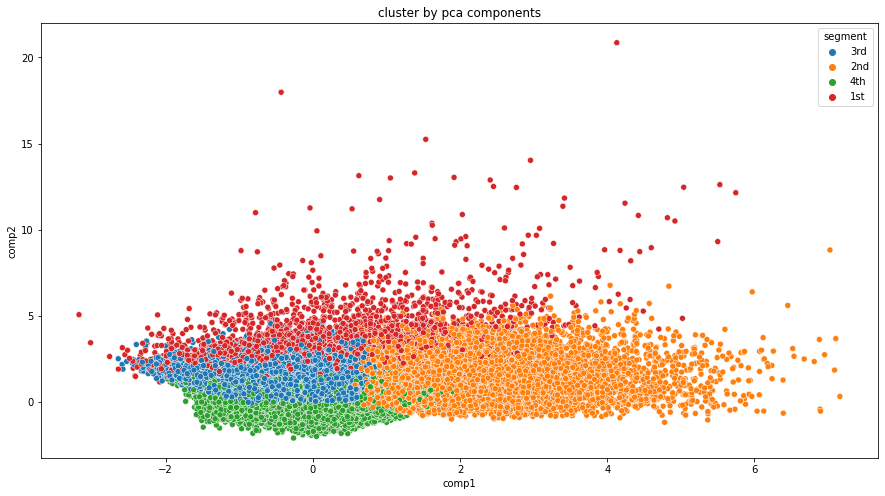

   temp average  temp Wind  humidity  pressure     cloud  Max_WindGust_Speed  \
0      0.403767   0.481235 -0.372809 -0.432853 -0.132848            0.510897   
1     -0.312930   0.266500  0.500261 -0.196260  0.536607            0.319853   
2      0.509164  -0.447435  0.055624 -0.472887  0.166917           -0.313954   
3     -0.081326   0.113437 -0.091599  0.335613 -0.482376            0.019587   
4      0.405150   0.179358 -0.299809  0.580493  0.601748           -0.063530   
5     -0.497953  -0.382021 -0.677755 -0.156498  0.257535            0.187751   
6     -0.247147   0.553367 -0.223677 -0.276402  0.073703           -0.706003   

   Rainfall_Amount  
0         0.019305  
1         0.389898  
2         0.432907  
3         0.791468  
4         0.103394  
5         0.143823  
6         0.049003  


In [111]:
x_axis=df_kmeans['comp1']
y_axis=df_kmeans['comp2']
plt.figure(figsize=(15,8))
sns.scatterplot(x_axis,y_axis,hue=df_kmeans['segment'])
plt.title('cluster by pca components')
plt.show()
print(pd.DataFrame(principalComponents.components_,columns=parser.columns))

In [31]:
# DT and testing depths using AUC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
y = Final_dataset ["ReductionBurn_Tomorrow"]
X = Final_dataset.drop(columns=['ReductionBurn_Tomorrow'])
depth= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33)

train_results=[]
test_results=[]
for i in depth:
    clf = DecisionTreeClassifier (max_depth = i)
    clf.fit(X_train,y_train)
    predictions_clf = clf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, predictions_clf)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    y_pred = clf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

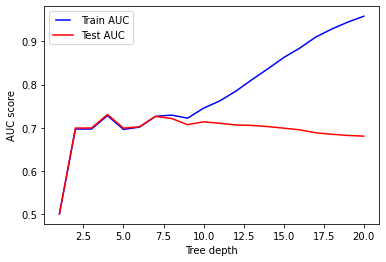

In [113]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(depth, train_results, 'b', label="Train AUC")
line2, = plt.plot(depth, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [36]:
# verify optimal depth
from sklearn.model_selection import cross_val_score
result= []
for j in depth:
    DT=DecisionTreeClassifier(max_depth = j)
    DT.fit(X_train,y_train)
    y_pred = DT.predict(X_test)
    result.append(cross_val_score(DT, X, y, cv=5, scoring='accuracy').mean())
result
max_index = result.index(max(result))
max_index

1

In [37]:
#decision tree,accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt

DT7 = DecisionTreeClassifier(max_depth = max_index+1)
DT7.fit(X_train,y_train)
pred_test = DT7.predict(X_test)
pred_train = DT7.predict(X_train)
cm = confusion_matrix(y_test, pred_test)

In [38]:
print("classification report: ",classification_report(y_test,pred_test))
print("confusion matrix: ",cm)
print("accuracy score: ",accuracy_score(y_test, pred_test))

classification report:                precision    recall  f1-score   support

           0       0.82      0.88      0.85     32077
           1       0.62      0.51      0.56     12372

    accuracy                           0.78     44449
   macro avg       0.72      0.70      0.71     44449
weighted avg       0.77      0.78      0.77     44449

confusion matrix:  [[28188  3889]
 [ 6013  6359]]
accuracy score:  0.7772278341469999


In [39]:
# cross validation score
scores = cross_val_score(DT7, X, y, cv=5, scoring='accuracy')
print("cross validation score: ",scores)

cross validation score:  [0.79813653 0.77690337 0.7532482  0.75528993 0.77700646]


In [118]:
# Neural network models (supervised)
from sklearn.neural_network import MLPClassifier
MPL= MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(15,25,50), random_state=1,activation='relu')
MPL.fit(X_train,y_train)
predict_train = MPL.predict(X_train)
predict_test = MPL.predict(X_test)
print(accuracy_score(y_test, predict_test))
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

0.7988031226799253
[[58206  6989]
 [11298 13750]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     65195
           1       0.66      0.55      0.60     25048

    accuracy                           0.80     90243
   macro avg       0.75      0.72      0.73     90243
weighted avg       0.79      0.80      0.79     90243



In [119]:
MPL_scores = cross_val_score(MPL, X, y, cv=5, scoring='accuracy')
print("cross validation score: ",MPL_scores)

cross validation score:  [0.8076766  0.79264264 0.77102977 0.7815725  0.79441681]


In [120]:
#  Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train,y_train)
gnb_predict_train = gnb.predict(X_train)
gnb_predict_test = gnb.predict(X_test)
print(accuracy_score(y_test, gnb_predict_test))
print(confusion_matrix(y_train,gnb_predict_train))
print(classification_report(y_train,gnb_predict_train))
gnb_scores = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
print("cross validation score: ",gnb_scores)

0.74051159756125
[[47942 17253]
 [ 6030 19018]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.80     65195
           1       0.52      0.76      0.62     25048

    accuracy                           0.74     90243
   macro avg       0.71      0.75      0.71     90243
weighted avg       0.79      0.74      0.75     90243

cross validation score:  [0.76101563 0.76261183 0.69129111 0.72488678 0.76642661]


In [44]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
KNN_result = []
for k in range(1,8):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)
    neigh_y_pred = neigh.predict(X_test)
    score = cross_val_score(neigh, X, y, cv=3, scoring='accuracy')
    KNN_result.append(score.mean())
neigh_max_index = KNN_result.index(max(KNN_result))
neigh_max_index

5

In [122]:
neigh = KNeighborsClassifier(n_neighbors=neigh_max_index+1)
neigh.fit(X_train,y_train)
neigh_y_pred =neigh.predict(X_test)
neigh_pred_train = neigh.predict(X_train)
cm = confusion_matrix(y_test, neigh_y_pred)
print("classification report: ",classification_report(y_test,neigh_y_pred))
print("confusion matrix: ",cm)
print("accuracy score: ",accuracy_score(y_test, neigh_y_pred))

classification report:                precision    recall  f1-score   support

           0       0.83      0.89      0.86     32100
           1       0.64      0.52      0.57     12349

    accuracy                           0.79     44449
   macro avg       0.74      0.70      0.72     44449
weighted avg       0.78      0.79      0.78     44449

confusion matrix:  [[28564  3536]
 [ 5956  6393]]
accuracy score:  0.7864518886814101


In [123]:
import tensorflow as tf
from tensorflow.keras import layers
dataframe = df1.copy(deep=True)
dataframe['City_Name'] =dataframe['City_Name'].astype(pd.StringDtype())
dataframe['City_State'] =dataframe['City_State'].astype(pd.StringDtype())
dataframe['Date'] =dataframe['Date'].astype(pd.StringDtype())
dataframe['Season'] =dataframe['Season'].astype(pd.StringDtype())
dataframe['Climate_Type'] =dataframe['Climate_Type'].astype(pd.StringDtype())
dataframe['Wind_Direction_AM'] =dataframe['Wind_Direction_AM'].astype(pd.StringDtype())
dataframe['Wind_Direction_PM'] =dataframe['Wind_Direction_PM'].astype(pd.StringDtype())
dataframe['Max_WindGust_Direction'] =dataframe['Max_WindGust_Direction'].astype(pd.StringDtype())
dataframe['Significant_Rainfall'] =dataframe['Significant_Rainfall'].astype(pd.StringDtype())

# dataframe['target'] = dataframe['ReductionBurn_Tomorrow']
# dataframe = df1.drop(columns=['ReductionBurn_Tomorrow'])

train, val, test = np.split(dataframe.sample(frac=1), [int(0.8*len(dataframe)), int(0.9*len(dataframe))])


In [124]:
def df_to_dataset(df1, shuffle=True, batch_size=32):
  df = df1.copy()
  labels = df.pop('ReductionBurn_Tomorrow')
  df = {key: value[:,tf.newaxis] for key, value in df1.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(Final_dataset))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [125]:
batch_size = 5
train_ds = df_to_dataset(train, batch_size=batch_size)

C:\Users\USER\AppData\Local\Temp\ipykernel_11756\1402964549.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in df1.items()}


In [126]:
[(train_features, label_batch)] = train_ds.take(1)
print('Every feature:', list(train_features.keys()))
print('A batch of min temp:', train_features['Minimum_Temperature'])
print('A batch of targets:', label_batch )

Every feature: ['City_Name', 'City_State', 'Date', 'Season', 'Climate_Type', 'Minimum_Temperature', 'Maximum_Temperature', 'Temperature_AM', 'Temperature_PM', 'Wind_Direction_AM', 'Wind_Direction_PM', 'Wind_Speed_AM', 'Wind_Speed_PM', 'Max_WindGust_Direction', 'Max_WindGust_Speed', 'Significant_Rainfall', 'Rainfall_Amount', 'Humidity_AM', 'Humidity_PM', 'Atmospheric_Pressure_AM', 'Atmospheric_Pressure_PM', 'CloudCover_Oktas_AM', 'CloudCover_Oktas_PM', 'ReductionBurn_Tomorrow']
A batch of min temp: tf.Tensor(
[[ 4.2]
 [18.7]
 [ 8. ]
 [11.2]
 [20.9]], shape=(5, 1), dtype=float64)
A batch of targets: tf.Tensor([1 1 1 0 1], shape=(5,), dtype=int64)


In [127]:
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = tf.keras.layers.experimental.preprocessing.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

In [128]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

In [129]:
test_type_col = train_features['Date']
test_type_layer = get_category_encoding_layer(name='Date',dataset=train_ds,dtype='string')
test_type_layer(test_type_col)

<tf.Tensor: shape=(5, 3319), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [130]:
# photo_count_col = train_features['Max_WindGust_Speed']
# layer = get_normalization_layer('Max_WindGust_Speed', train_ds)
# layer(photo_count_col)

In [131]:
batch_size = 256
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

C:\Users\USER\AppData\Local\Temp\ipykernel_11756\1402964549.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in df1.items()}
C:\Users\USER\AppData\Local\Temp\ipykernel_11756\1402964549.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in df1.items()}
C:\Users\USER\AppData\Local\Temp\ipykernel_11756\1402964549.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in df1.items()}


In [132]:
all_inputs = []
encoded_features = []

# Numerical features.
for header in ['Minimum_Temperature', 'Maximum_Temperature','Temperature_AM','Temperature_PM','Wind_Speed_AM','Wind_Speed_PM',
               'Max_WindGust_Speed','Rainfall_Amount','Humidity_AM','Humidity_PM','Atmospheric_Pressure_AM','Atmospheric_Pressure_PM',
               'CloudCover_Oktas_AM','CloudCover_Oktas_PM']:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

In [133]:
dataframe.dtypes

City_Name                   string
City_State                  string
Date                        string
Season                      string
Climate_Type                string
Minimum_Temperature        float64
Maximum_Temperature        float64
Temperature_AM             float64
Temperature_PM             float64
Wind_Direction_AM           string
Wind_Direction_PM           string
Wind_Speed_AM              float64
Wind_Speed_PM              float64
Max_WindGust_Direction      string
Max_WindGust_Speed         float64
Significant_Rainfall        string
Rainfall_Amount            float64
Humidity_AM                float64
Humidity_PM                float64
Atmospheric_Pressure_AM    float64
Atmospheric_Pressure_PM    float64
CloudCover_Oktas_AM          int64
CloudCover_Oktas_PM          int64
ReductionBurn_Tomorrow       int64
dtype: object

In [134]:
categorical_cols = ['City_Name', 'City_State', 'Date', 'Season', 'Climate_Type',
                    'Wind_Direction_AM', 'Wind_Direction_PM', 'Max_WindGust_Direction', 'Significant_Rainfall']

for header in categorical_cols:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_ds,
                                               dtype='string',
                                               max_tokens=5)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

In [135]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(128, activation="relu")(all_features)
x = tf.keras.layers.Dense(128, activation="relu")
x = tf.keras.layers.Dense(128, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)

In [136]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=["accuracy"],
                      optimizer = 'adamax')

In [137]:
model.fit(train_ds, epochs=20, validation_data=val_ds,batch_size=256)

Epoch 1/20


d:\anaconda\envs\7212\lib\site-packages\keras\engine\functional.py:559: UserWarning: Input dict contained keys ['ReductionBurn_Tomorrow'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


421/421 [==============================] - 3s 3ms/step - loss: 0.4566 - accuracy: 0.7708 - val_loss: 0.4251 - val_accuracy: 0.7872
Epoch 2/20
421/421 [==============================] - 2s 3ms/step - loss: 0.4291 - accuracy: 0.7843 - val_loss: 0.4174 - val_accuracy: 0.7916
Epoch 3/20
421/421 [==============================] - 2s 2ms/step - loss: 0.4228 - accuracy: 0.7881 - val_loss: 0.4136 - val_accuracy: 0.7919
Epoch 4/20
421/421 [==============================] - 2s 3ms/step - loss: 0.4193 - accuracy: 0.7896 - val_loss: 0.4115 - val_accuracy: 0.7898
Epoch 5/20
421/421 [==============================] - 2s 2ms/step - loss: 0.4171 - accuracy: 0.7909 - val_loss: 0.4094 - val_accuracy: 0.7920
Epoch 6/20
421/421 [==============================] - 2s 3ms/step - loss: 0.4153 - accuracy: 0.7918 - val_loss: 0.4086 - val_accuracy: 0.7952
Epoch 7/20
421/421 [==============================] - 2s 3ms/step - loss: 0.4145 - accuracy: 0.7919 - val_loss: 0.4072 - val_accuracy: 0.7946
Epoch 8/20
421/42

In [138]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

53/53 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8059
Accuracy 0.8058648705482483
